In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# Fourier Series

Fourier series are used to approximate periodic functions and serves as the starting point to the broader topic of Fourier analysis.


$$ 
    f(x) = a_0 + \sum_{n=1}^{\infty}a_ncos(nx) + b_nsin(nx)\qquad n=1, 2, ..., \infty \tag{1} 
$$

Given a periodic function $f(x)$ with period $2\pi$ that's continous (or piece-wise continuous) on the interval $[-\pi, \pi]$, if the RHS converges (the summation doesn't blow up to infinity) and has the sum $f(x)$, then we call it the Fourier series of $f(x)$. On a computer you can't evaluate this series to an infinite number of terms. Instead you sum up the first finite number of terms and get an approximation of f(x) called a partial sum. The more terms you sum up, the closer the approximation. $a_0$, the cosine coefficients $a_n$, and the sine coefficients $b_n$ are given by the Euler formulas.

$$a_0 = \frac{1}{2\pi}\int_{-\pi}^{\pi}f(x) dx \tag{2}$$
$$a_n = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)cos(nx) dx \tag{3}$$
$$b_n = \frac{1}{\pi}\int_{-\pi}^{\pi}f(x)sin(nx) dx \tag{4}$$

$a_0$ is just the mean of $f(x)$. Notice that f(x) can be piece-wise continuous, but Fourier series are continuous functions - what happens at points of discontinuity in f(x)? Intuitively, they evaluate to an "average" value at those points. In math speak, let $x_0$ be a point where f(x) is discontinuous (there'll be an infinite number of these since f(x) is a periodic function). The Fourier series for f(x) evaluates to
$$\frac{\lim_{x \to x_0^{-}}f(x) + \lim_{x \to x_0^{+}}f(x)}{2}$$   

You can see this in picture below. At points of discontinuity in the wave, the series approximation is equal to $\frac{1+(-1)}{2}=0$.

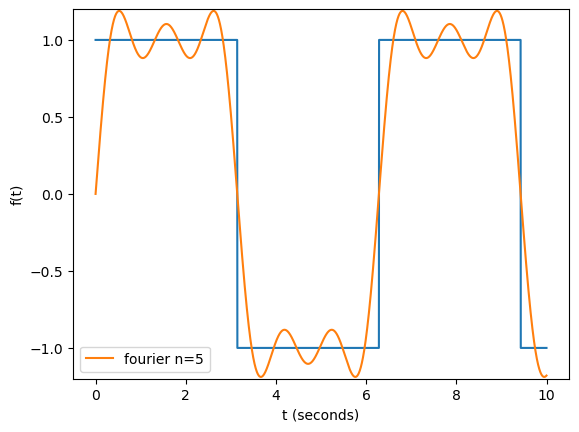

In [2]:
class Wave:

    def __init__(self, amp=1, freq=5):
        """
        Define a waveform.
        amp: wave amp
        freq: wave freq (Hz)
        """
        self.amp = amp
        self.freq = freq


    def fourier(self, t, n):
        pass


    def plot(self, f, samp_len=1, samp_rate=500, n=5):
        """
        Sample and plot the wave, along with Fourier appox. E.g. Sample at 500 Hz for 1 second and plot.
        samp_len: how long to sample (s)
        samp_rate: sampling rate, something large (Hz)
        """
        t = np.linspace(0, samp_len, num=int(samp_rate * samp_len), endpoint=False)

        plt.plot(t, self.amp*f(2*np.pi*self.freq*t))  # plot waveform
        plt.plot(t, self.fourier(t, n), label=f'fourier n={n}')  # plot Fourier series 
        plt.xlabel('t (seconds)'); plt.ylabel('f(t)')
        plt.ylim(-self.amp*1.2, self.amp*1.2)  # give some headspace
        plt.legend()
        plt.show()


class SqWave(Wave):
    def fourier(self, t, n=5):
        # coefs
        b_n = np.array([2*self.amp/(_n*np.pi) * (1-np.cos(_n*np.pi)) for _n in range(1, n+1)]) 
        # sine terms
        p = 1/self.freq
        l = p/2
        sine = lambda t: [np.sin(_n*np.pi*t/l) for _n in range(1, n+1)]
        return [b_n.dot(sine(_t)) for _t in t]
        
sq = SqWave(1, 1/(2*np.pi))
sq.plot(signal.square, 10, 500, 5)

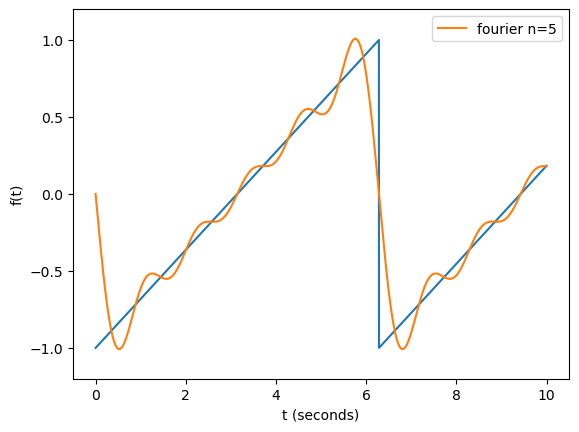

In [3]:
class SawTooth(Wave):
    def fourier(self, t, n=5):
        # coefs
        b_n = np.array([-2*self.amp/(_n*np.pi) * np.cos(_n*np.pi) for _n in range(1, n+1)]) 
        # sine terms
        p = 1/self.freq
        l = p/2
        sine = lambda t: [np.sin(_n*(t + l)*np.pi/l) for _n in range(1, n+1)]
        return [b_n.dot(sine(_t)) for _t in t]
        
saw = SawTooth(1, 1/(2*np.pi))
saw.plot(signal.sawtooth, 10, 500, 5)

We can extend to functions of arbitrary period $2L$: let $f(x)$ have the period $2\pi$ with Fourier series expansion (1). We know $f(ax)$ has the period $2\pi/a$ and Fourier expansion 
$$ 
    f(x) = a_0 + \sum_{n=1}^{\infty}a_ncos(anx) + b_nsin(anx)\qquad n=1, 2, ..., \infty
$$

We can parameterize $f(x)$ by saying it has the period $2L$, so $2\pi/a = 2L$, $a = \pi/L$.
$$ 
    f(x) = a_0 + \sum_{n=1}^{\infty}a_ncos(\frac{n\pi x}{L}) + b_nsin(\frac{n\pi x}{L})\qquad n=1, 2, ..., \infty \tag{5}
$$

$$a_0 = \frac{1}{2L}\int_{-L}^{L}f(x) dx \tag{2}$$
$$a_n = \frac{1}{L}\int_{-L}^{L}f(x)cos(\frac{n\pi x}{L}) dx \tag{3}$$
$$b_n = \frac{1}{L}\int_{-L}^{L}f(x)sin(\frac{n\pi x}{L}) dx \tag{4}$$


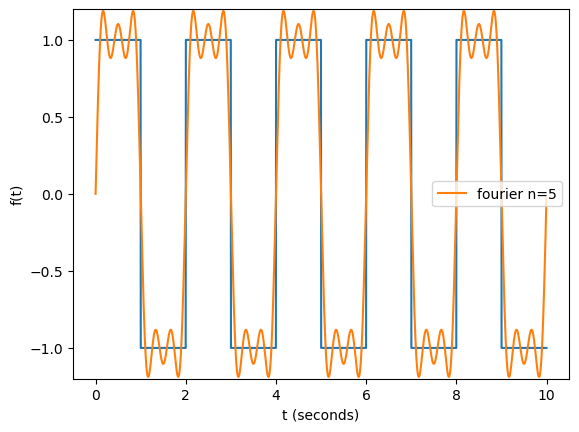

In [4]:
sq = SqWave(1, 1/2)
sq.plot(signal.square, 10, 500, 5)

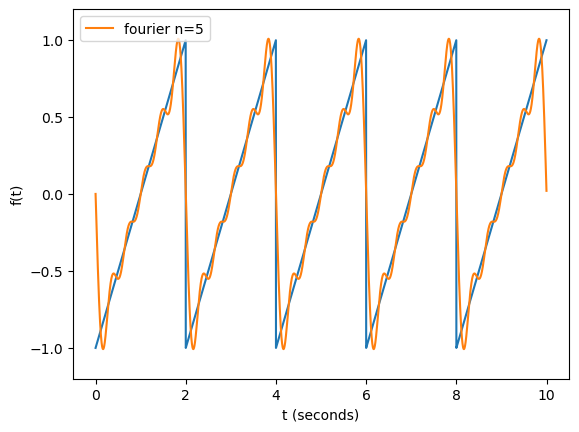

In [5]:
saw = SawTooth(1, 1/2)
saw.plot(signal.sawtooth, 10, 500, 5)